# An introduction to making scientific figures in Python with the Matplotlib visualization library
## Tijs van Lieshout
## 2nd of March 2020

In [1]:
print("An interactive demo/workshop!")

An interactive demo/workshop!


# Why matplotlib?
## "Matplotlib makes easy things easy and hard things possible."
- Low-level > good for learning / understanding the basics
- Works fine for simple data and python datatypes


# Installation

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

# Terminology
![Terminology](https://matplotlib.org/stable/_images/anatomy.png)

# Basics of matplotlib
## Explained with data from kittens

![Kitten](https://vetsonparker.com.au/wp-content/uploads/2017/08/kitten.jpg)

# The dataset
## Cat weight in kg by age in months

In [4]:
# data from https://www.healthynex.com/cat-weight-chart-by-age-in-kg-ib.html
cat_age_in_months = [1, 2, 3, 4, 5, 7, 9, 10, 11, 12]
cat_weight_in_kg = [0.8, 1.3, 1.8, 1.9, 1.9, 2.0, 2.1, 2.1, 2.2, 2.2]

In [5]:
print(len(cat_age_in_months) == len(cat_weight_in_kg))

True


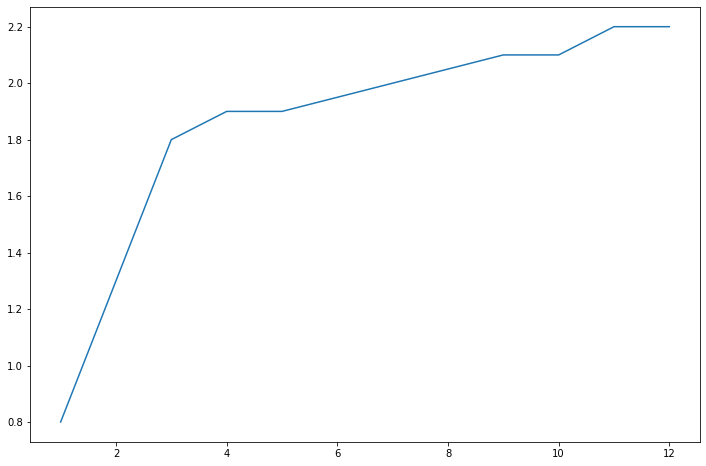

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(cat_age_in_months, cat_weight_in_kg)
plt.show()

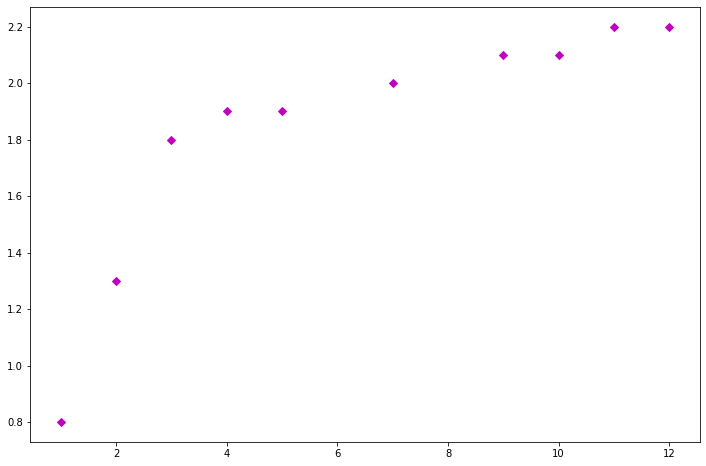

In [7]:
plt.figure(figsize=(12, 8))
# o, ro, k+, c--, mD
plt.plot(cat_age_in_months, cat_weight_in_kg, 'mD')
plt.show()

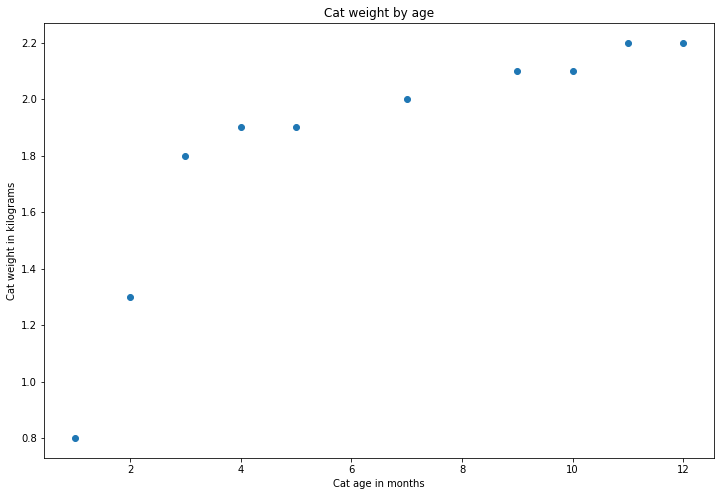

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(cat_age_in_months, cat_weight_in_kg, 'o')
plt.xlabel('Cat age in months')
plt.ylabel('Cat weight in kilograms')
plt.title("Cat weight by age")
plt.show()

In [9]:
plt.rcParams.update({'font.size': 22})

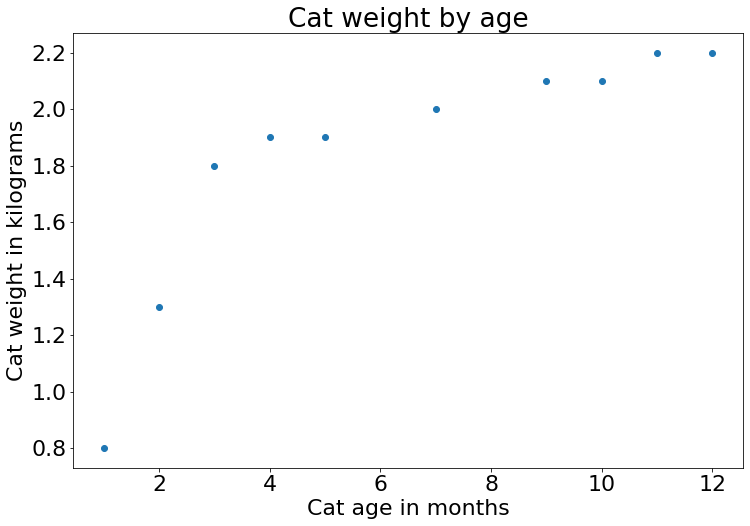

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(cat_age_in_months, cat_weight_in_kg, 'o')
plt.xlabel('Cat age in months')
plt.ylabel('Cat weight in kilograms')
plt.title("Cat weight by age")
plt.show()

# Pyplot vs. Object-oriented style


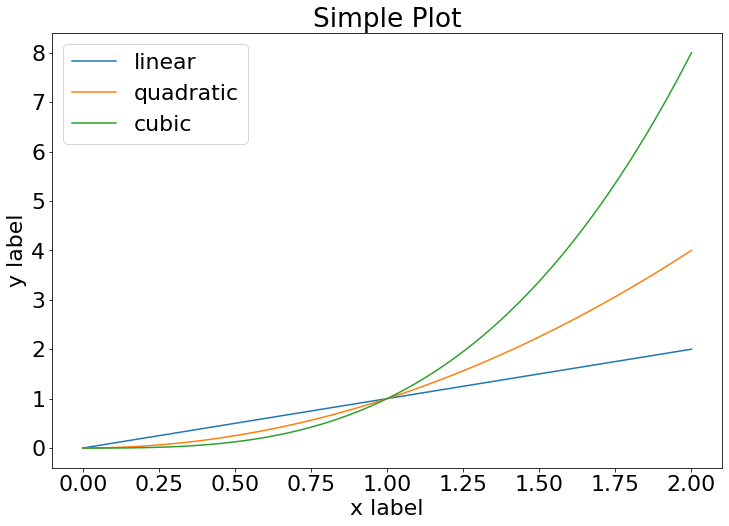

In [11]:
import numpy as np
x = np.linspace(0, 2, 100)

plt.figure(figsize=(12, 8))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

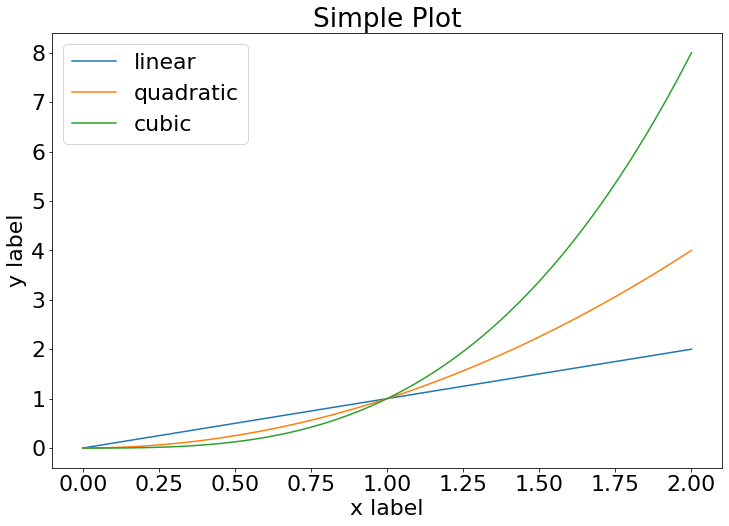

In [12]:
import numpy as np
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots(figsize=(12, 8))  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

# Categorical data
## The dataset
### Countries with the most pet cats in the EU

In [13]:
# data from https://www.worldatlas.com/articles/10-countries-in-the-european-union-with-most-cats.html
countries = ["Germany", "France", "UK", "Italy", "Poland", "Romania", "Spain", "Netherlands", "Belgium", "Austria"]
number_of_cats_in_millions = [14.5, 13.5, 7.5, 7.3, 6.4, 4.3, 3.145, 2.640, 2.050, 2.034]

In [14]:
print(len(countries) == len(number_of_cats_in_millions))

True


![bad_plot](bad_plot_example.png)

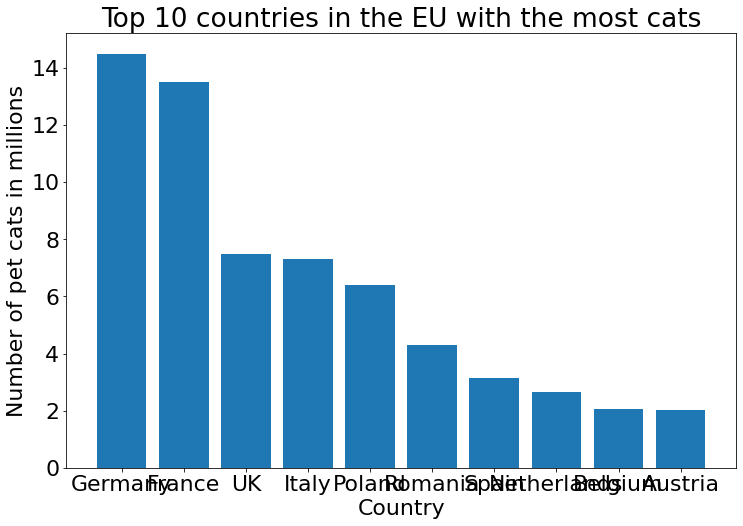

In [15]:
plt.figure(figsize=(12, 8))
# plt.plot(countries, number_of_cats_in_millions)
plt.bar(countries, number_of_cats_in_millions)
plt.xlabel('Country')
plt.ylabel('Number of pet cats in millions')
plt.title("Top 10 countries in the EU with the most cats")
plt.show()

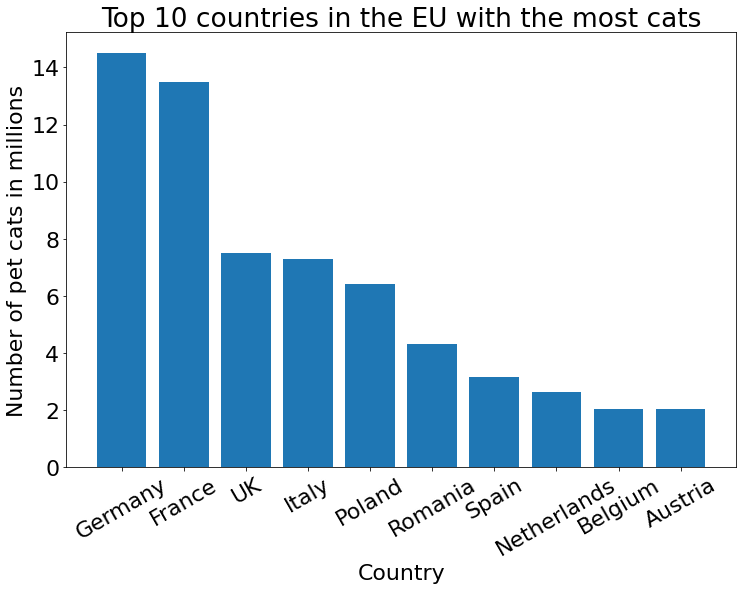

In [16]:
plt.figure(figsize=(12, 8))
plt.bar(countries, number_of_cats_in_millions)
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('Number of pet cats in millions')
plt.title("Top 10 countries in the EU with the most cats")
plt.show()

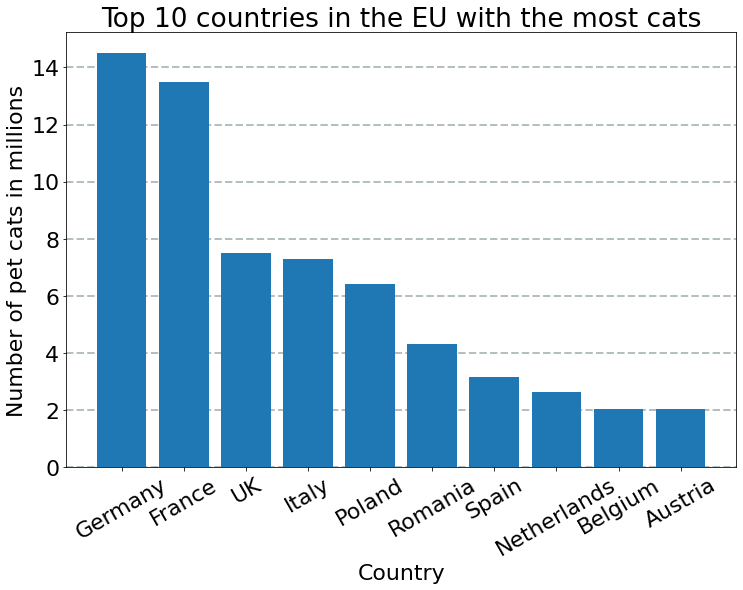

In [17]:
plt.figure(figsize=(12, 8))
plt.bar(countries, number_of_cats_in_millions, zorder=3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7, zorder=0)
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('Number of pet cats in millions')
plt.title("Top 10 countries in the EU with the most cats")
plt.show()

# Data-Ink ratio
$$\text{Data-Ink ratio} = \frac{\text{Data-Ink}}{\text{Total ink used to print the graphic}}$$

In [18]:
def plot_pet_cats_globally():
    fig, ax = plt.subplots(figsize=(12, 8))
    rects = ax.bar(countries, number_of_cats_in_millions, color='black')

    for rect in rects:
            height = rect.get_height()
            ax.annotate(xy=(rect.get_x() + rect.get_width()/2., height),
                        text=round(height, 1), ha='center', va='bottom')

    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

    ax.set(title="Top 10 countries in the EU with the most cats (in millions)", 
           yticklabels=[], ylim=(0,16))
    ax.tick_params(left=False)

    plt.xticks(rotation=30)
    return plt

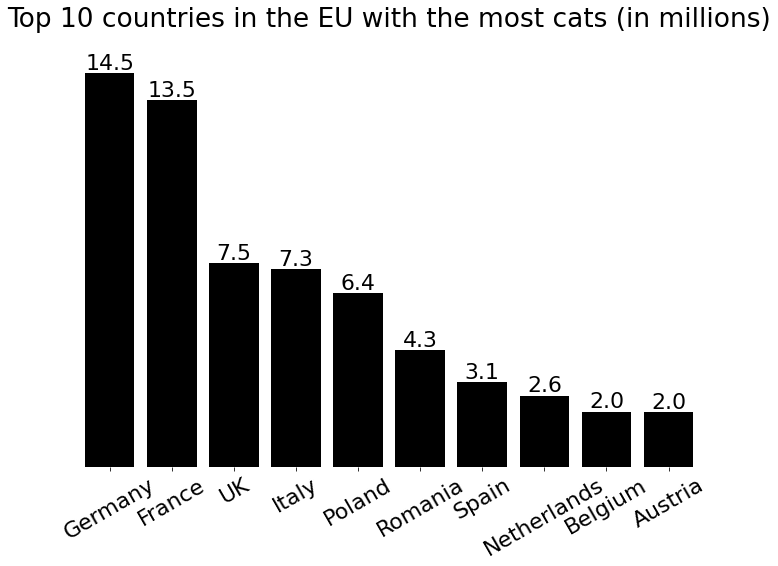

In [19]:
plt.show(plot_pet_cats_globally())

![bad_plot](comparison.png)

In [20]:
import base64
import io 

def save_fig_to_html(fig):
    fig.tight_layout()
    
    pic_IObytes = io.BytesIO()
    fig.savefig(pic_IObytes, format='png')
    pic_IObytes.seek(0)
    
    pic_hash = base64.b64encode(pic_IObytes.read())

    image_html =f'<img src=\'data:image/png;base64,{pic_hash.decode("utf-8")}\'>'

    with open('example.html', 'w') as f:
            f.write(image_html)

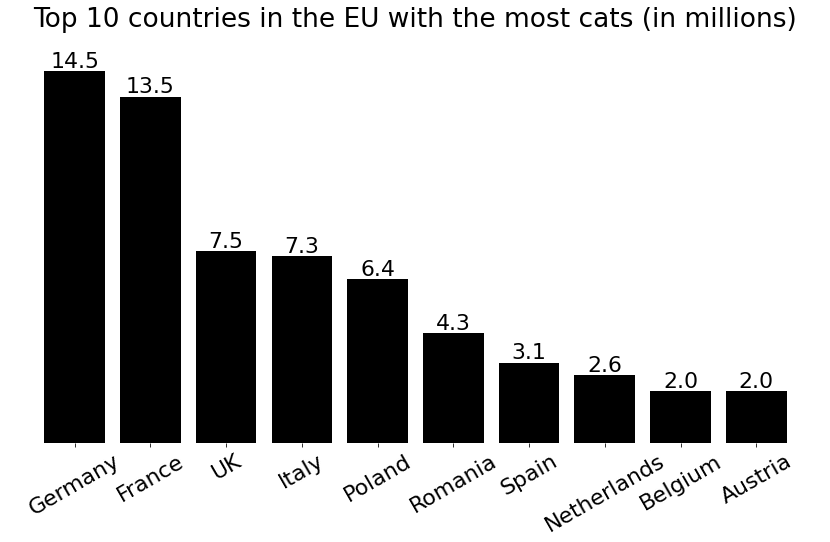

In [21]:
fig = plot_pet_cats_globally()
save_fig_to_html(fig)

# For further reading and used sources:
- https://matplotlib.org/stable/tutorials/introductory/usage.html
- https://matplotlib.org/stable/tutorials/introductory/pyplot.html